# Assignment0 

Atefeh Mahdavi Goloujeh

## Introduction

In the first part I briefly summerize important points that I found in the first two chapters of Deep learning book.
Then two datasets (regression and classification) will be explored through series of visualizations. All the necassary steps for preprocessing data and reading the data is being used by pandas library. 

## Review 

### Linear algebra
Disclaimer: the follwoing section is a summerization of Deep learning book, chapter 2.  

A vector is an array of numbers.
$$A_{m} = 
 \begin{pmatrix}
  a_{1,1}  \\
  a_{2,1}  \\
  \vdots    \\
  a_{m,1}  
 \end{pmatrix}$$

while a matrix is a 2D array of numbers.
$$A_{m,n} = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
 \end{pmatrix}$$
When we need an array with more than two axis we use Tensors.

One important operation in matrixes is transpose which is defined such that:

$$(A^T)_{i,j} = A_{j,i}$$

Transpose of a matrix as is obvious in above formula is the mirror image of the matrix across its diagonal line.
The concept of identity matrix and inverse matrixes is another important subject in this chapter. Identity matrix can be defined as a matrix which doesn't change any vector when we multiply them together. The matrix inverse or $A^-1$ is defined as $$A^{-1} A = I_{n}$$

To measure the size of a vector in machine learning a function called norm is usually being used. 

$$||x|| _{p} = (\sum |x_{i}|^p)^{1/p}$$

Singular value decomposition is a method with which we can factorize a matrix to singular valuesand singular vectors.

$$A = UDV^{T}$$

The determinant of a matrix (only applies to square matrices) is a function that maps matrices to scalars which is equal to theproduct of eigenvalues of the matrix. It can be between 0 and 1. 

The trace operator is the sum of all the diagonal entries of a matrix. 

$$ Tr(A) = \sum A_{i,i} $$


### Probability theory
Disclaimer: the follwoing section is a summerization of Deep learning book, chapter 3.  

Although many computer science branches deal with deterministic concepts, that is not the case with machine learning. For representing and reasoning about uncertainty probability theories can be a great tool. 
"Frequentist probablity is related to the rates at which events occure."
"Bayesian probability is related to qualitative levels of uncertainty."

Random variable can take any different value and can be either discrete or continous. Random variables are not necessarily numerical. 
Probabilty Mass Functions or PMF "or P maps from a state of a random variable to the probabilty of that random variable. Joint probabilty distribution denotes the probability of many variables at the same time. $P(X=x, Y=y)$ denotes the probability of $X$ and $Y$ simultaneously.

These two important rules must be satisfied:

 $$ \forall x \in X, 0 \leq P(x) \leq 1. $$
 
 $$ \sum P(x)= 1. $$


For a discrete ransom variable $x$ with $k$ different states:
$$ P(X=x_{i}) = \frac {1} {k} $$

For continous random variables the probability is described using probability density distribution. 

Marginal probability distribution is refered to the probablity distribution over a subset of variables. 

$$ \forall x \in X, P(X = x) = \sum P(X=x, Y=y) $$

and for continous variables it will be computed by:

  $$p(x) = \int p(x,y) \mathrm{d}y $$

Conditional probability "is the case that we are interested in the probability of some event given that some other event happened.

" $$P(X=x | Y=y) = \frac {P(Y=y , X=x)}{P(X=x)}$$

The "expectation" of "expected value" is the mean value of a function $f(x)$ with respect to the $P(x)$. For discrete variable oit can be computed with:

$$ E_{x}\sim P[f(x)] = \sum P(x)f(x) $$

and for continous variables it is:

$$ E_{x}\sim P[f(x)] = \int P(x)f(x) \mathrm{d}x $$

## Data

## Introduction of data for regression & source
This dataset is a bike sharing system data which contains attributes related to time, weather condition and registrations status. The target is the count of bikes per day.

The source of data is UCI website. More information about the source can be found on the references section.

In [10]:
!head -10 hour.csv

There are 17 attributes in this dataset. <dteday,season,yr,mnth,hr,holiday,weekday,workingday> are refering to the date and time and and some other related information about the day in which data was collected. <weathersit,temp,atemp,hum,windspeed> are refering to the weather condition. Finally <casual,registered,cnt> are refering to the registration stutus of the user.

## Preprocessing of the data
In this section I will read the data and remove the null values if any from the dataset. I also slice the instances for increasing the runtime in visualization.

In [2]:
# libraries
from IPython.display import Math
import pandas as pd 
import json
import csv 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")


### Read data

In [3]:
with open("hour.csv") as csvFile:
    csvReader = csv.DictReader(csvFile)
    data = [i for i in csvReader]
df = pd.DataFrame(data)
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0,8,6,14


The size of the dataset:


In [12]:
df.size

295443

In [4]:
df.notnull()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


As it shows below there aren't any null values in the dataset and I don't need to change the format of any attributes.

In [ ]:
df = df[df.notnull()]

In [19]:
print("Size of data= ", df.size)
print("Shape of data= ", df.shape)

Size of data=  295443
Shape of data=  (17379, 17)


In [8]:
df.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'], dtype=object)

Converting the string values of specific columns to numeric values.

In [5]:
df[["temp", "atemp", "hum", "windspeed", "casual","registered", "cnt"]] = df[["temp", "atemp", "hum", "windspeed", "casual","registered", "cnt"]].apply(pd.to_numeric)
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


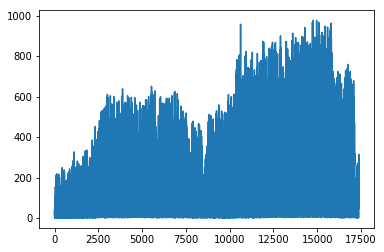

In [42]:
plt.plot(df.loc[:, 'cnt'])

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

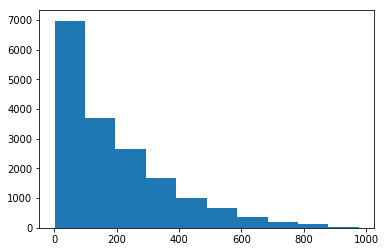

In [43]:
plt.hist(df.loc[:, 'cnt'])

In [35]:
df.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Visualization of the data

I started visualizing scatter plot of different attributes in relation to the bike counts (cnt) to see what I can see in the data.

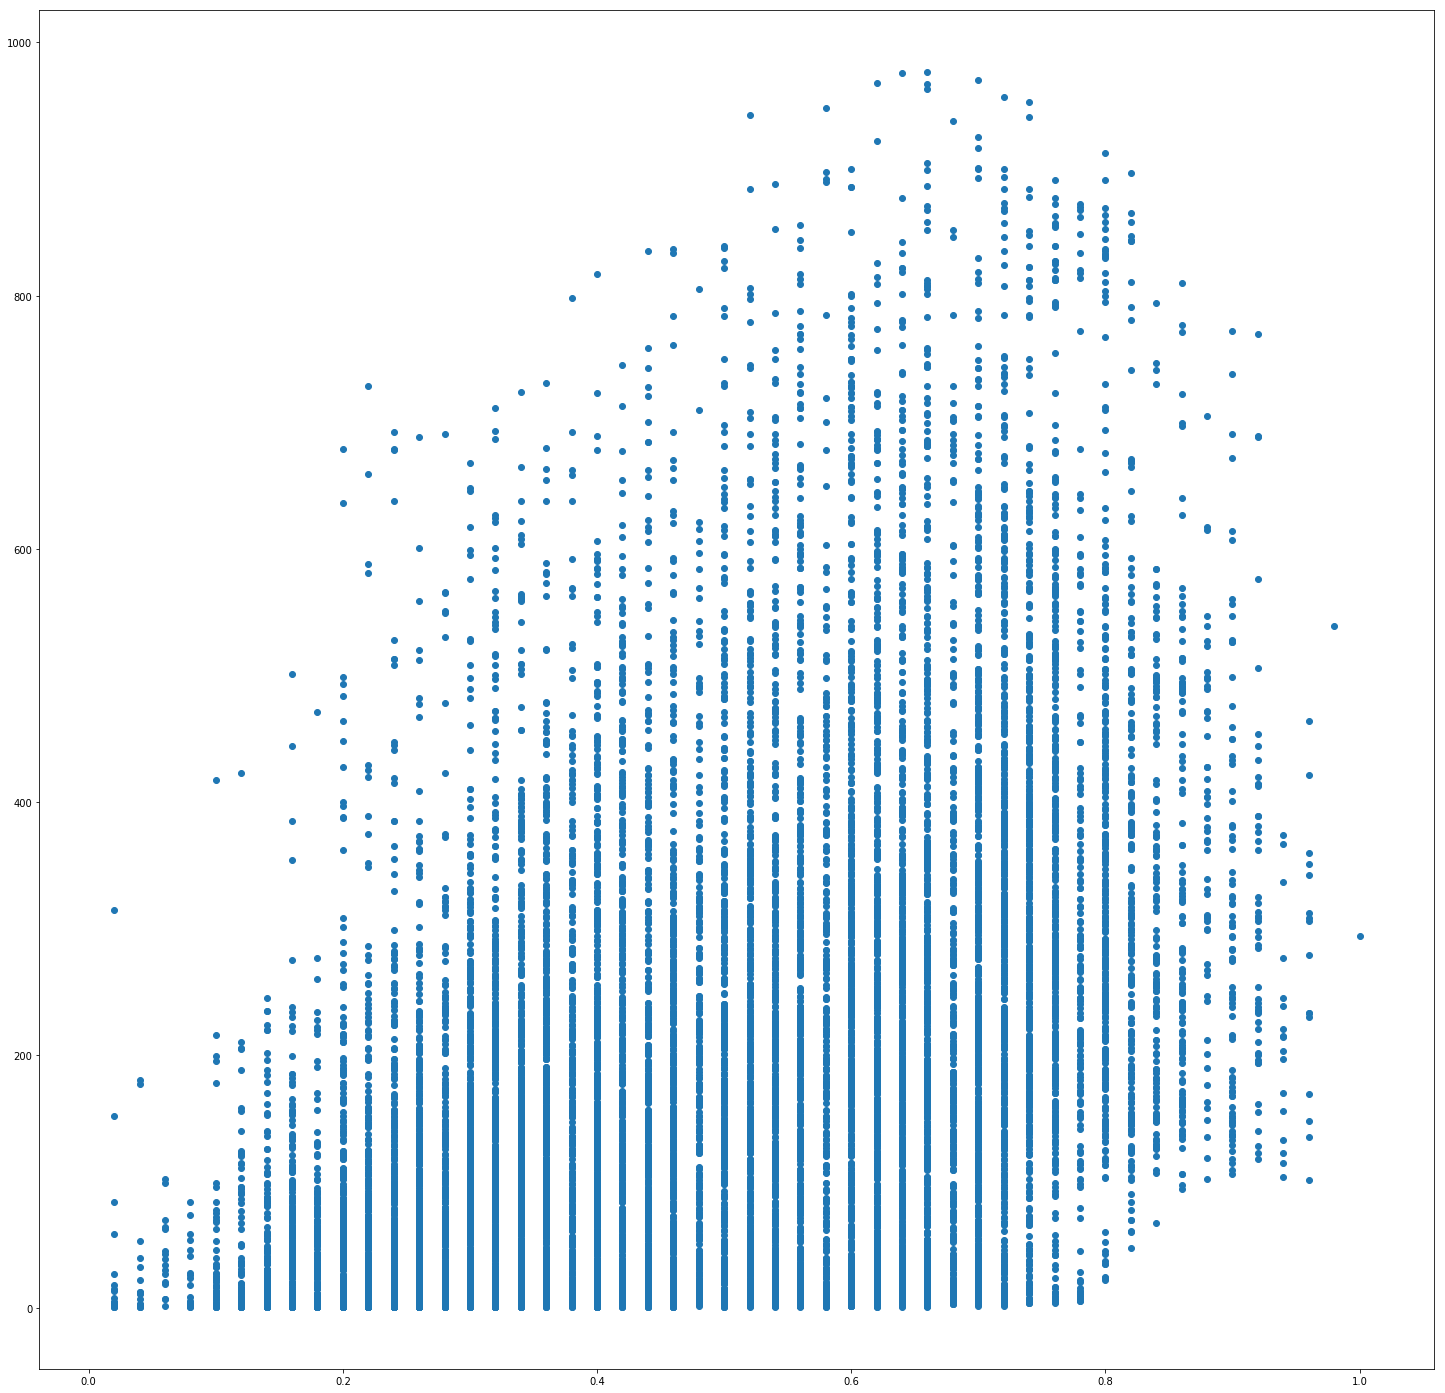

In [29]:
#Visualization of the data
plt.scatter(df.temp, df.cnt)
fig = plt.gcf()
fig.set_size_inches(25, 25, forward=True)
plt.show()

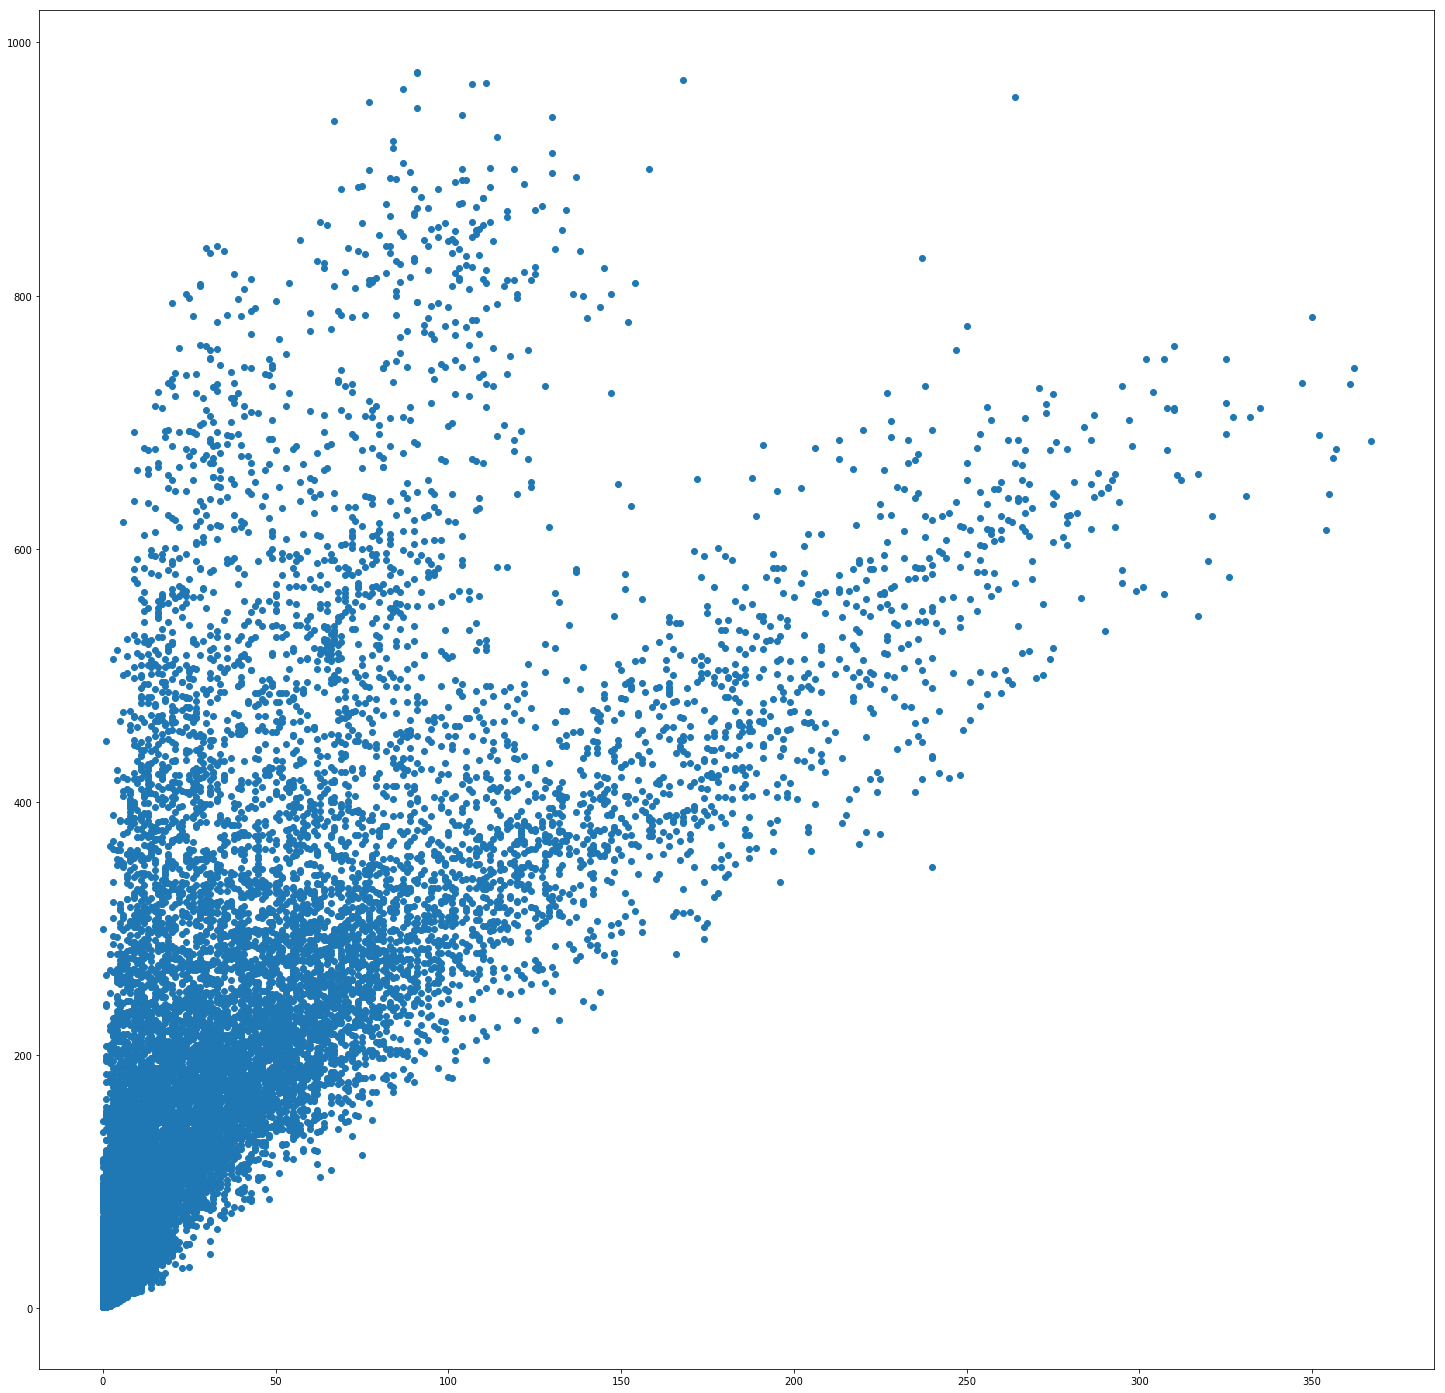

In [30]:
plt.scatter(df.casual, df.cnt)
fig = plt.gcf()
fig.set_size_inches(25, 25, forward=True)
plt.show()


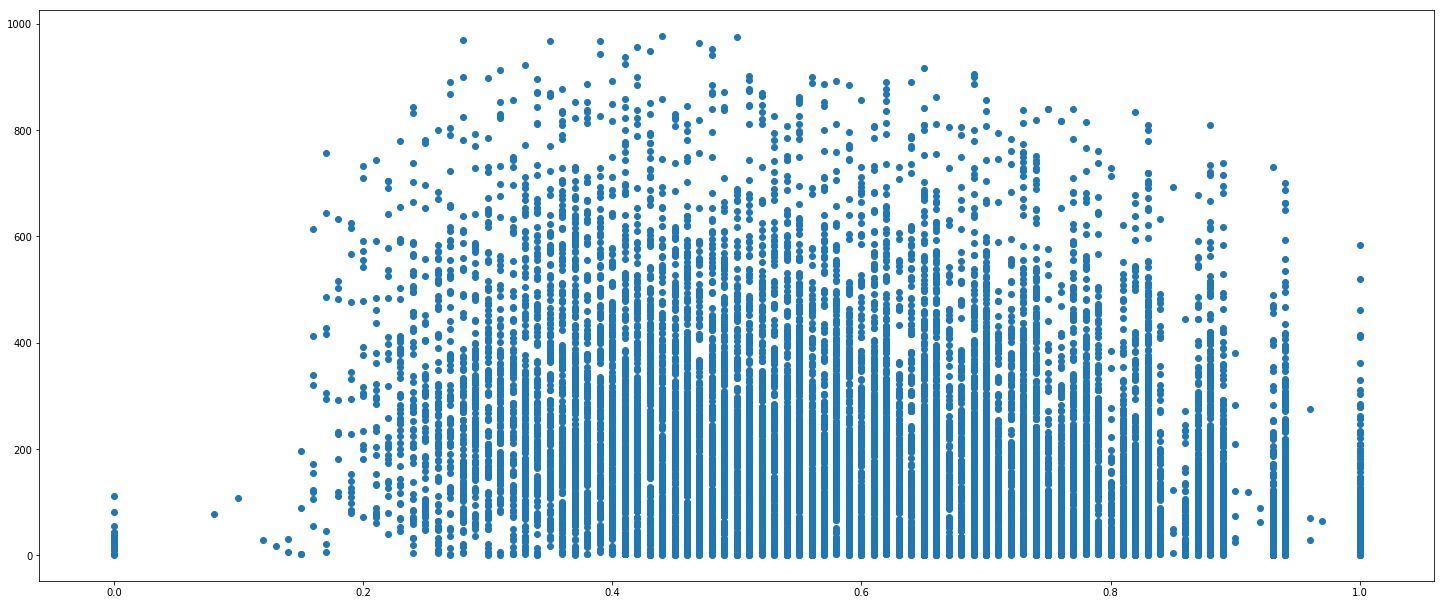

In [31]:
plt.scatter(df.hum, df.cnt)
fig = plt.gcf()
fig.set_size_inches(25, 10.5, forward=True)
plt.show()

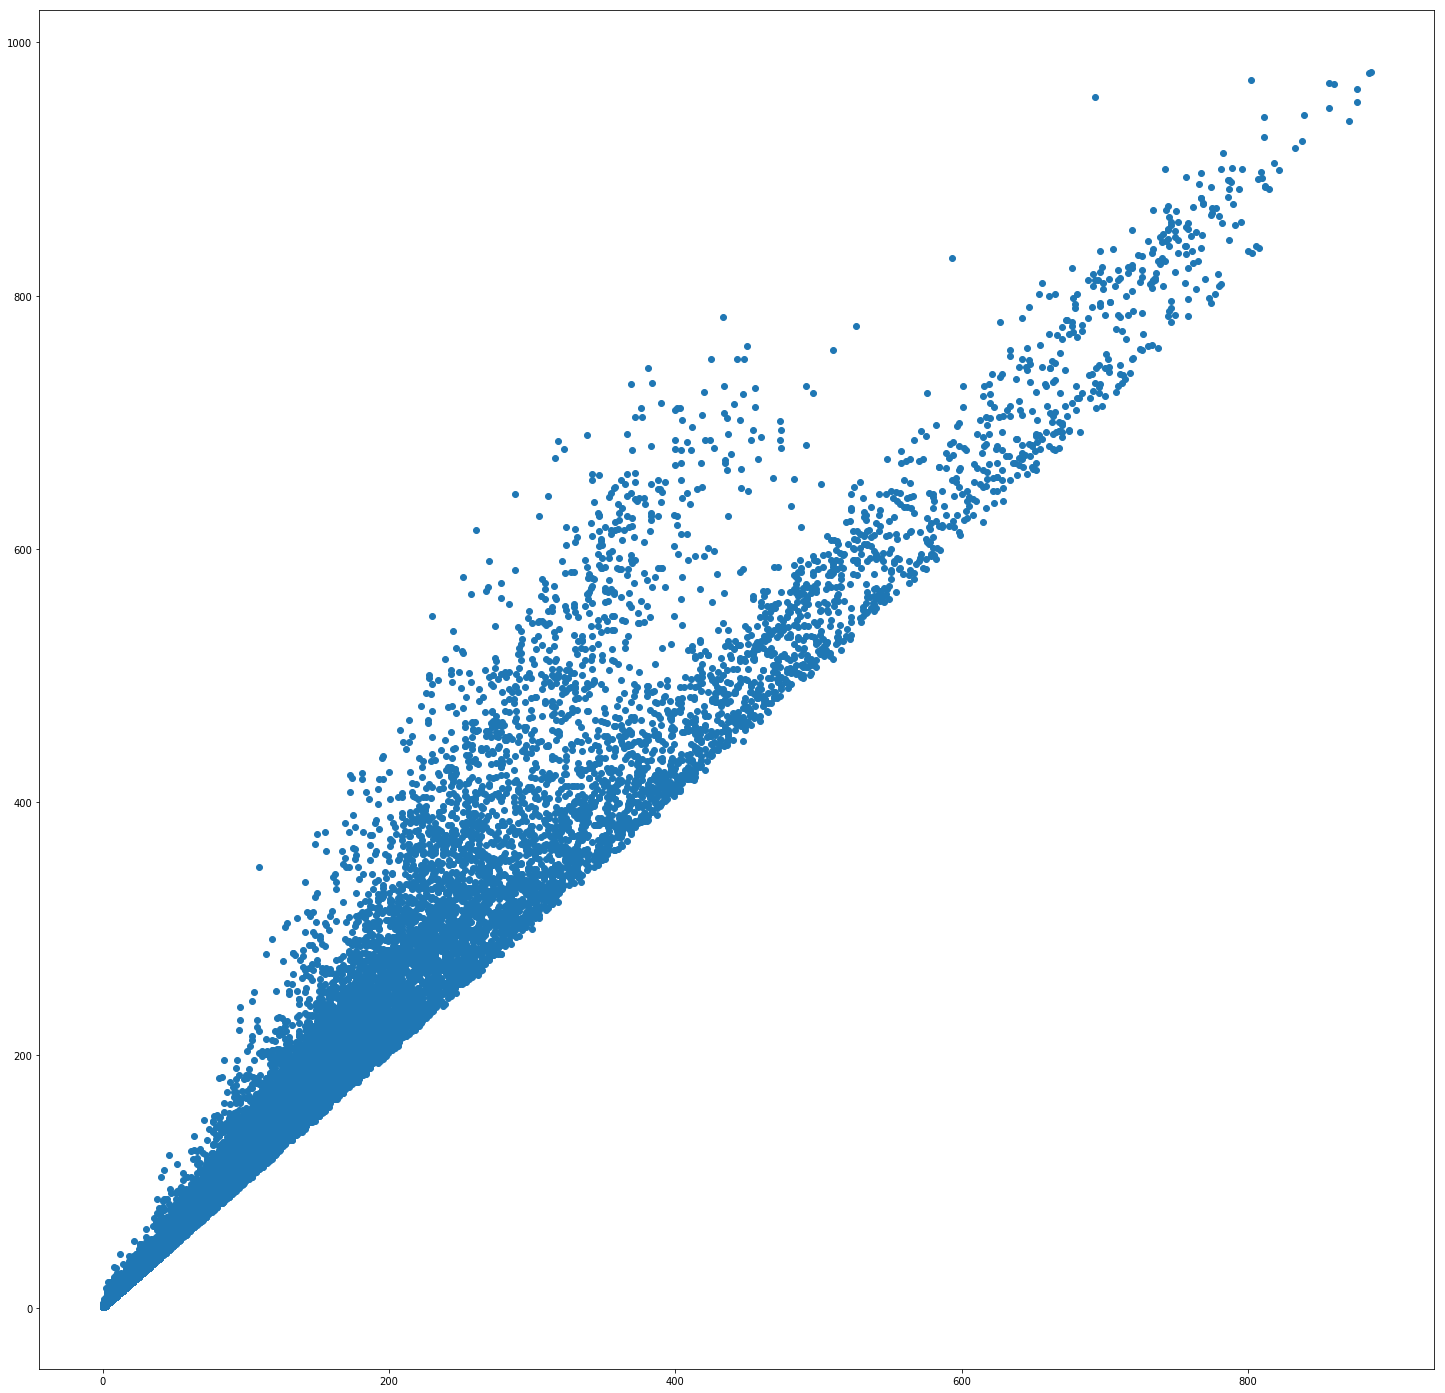

In [32]:
plt.scatter(df.registered, df.cnt)
fig = plt.gcf()
fig.set_size_inches(25, 25, forward=True)
plt.show()

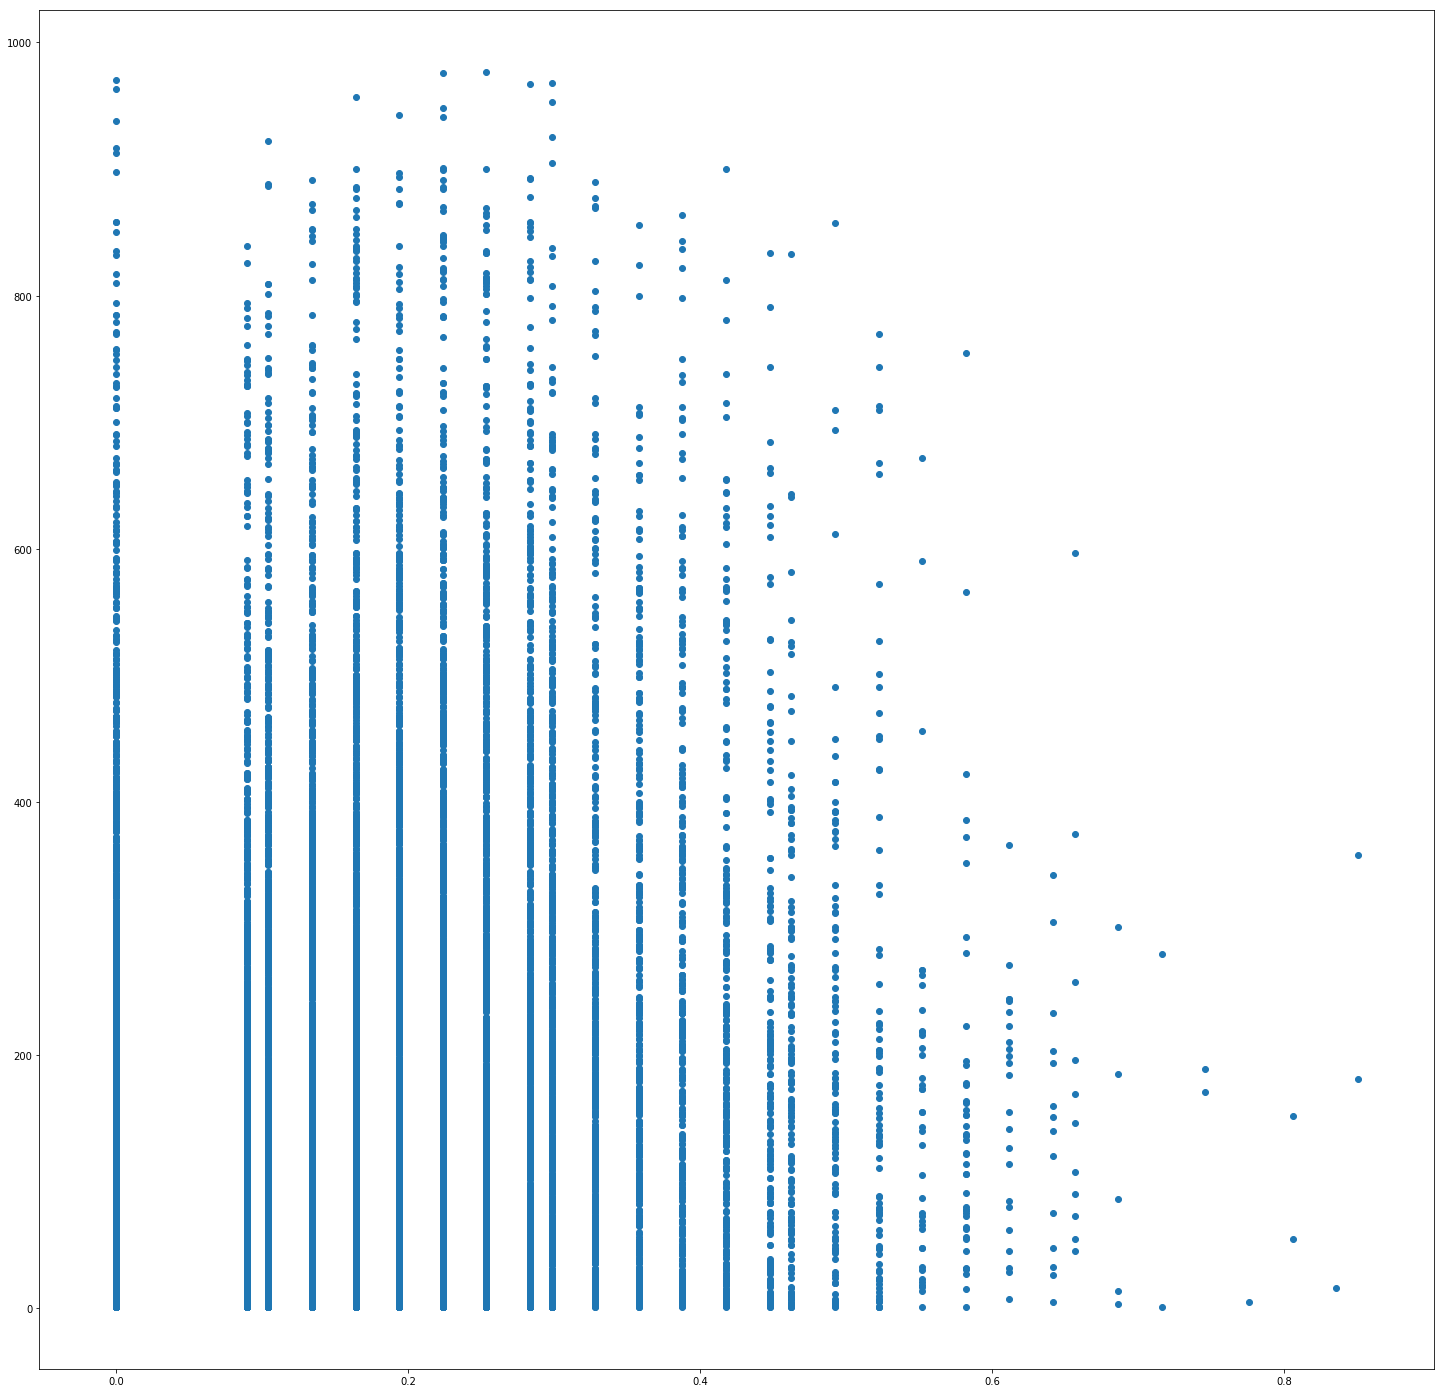

In [33]:
plt.scatter(df.windspeed, df.cnt)
fig = plt.gcf()
fig.set_size_inches(25, 25, forward=True)
plt.show()

As I saw the data seems to be very categorical, I Filtered the data for one day. It shows a pattern but data points are too few.

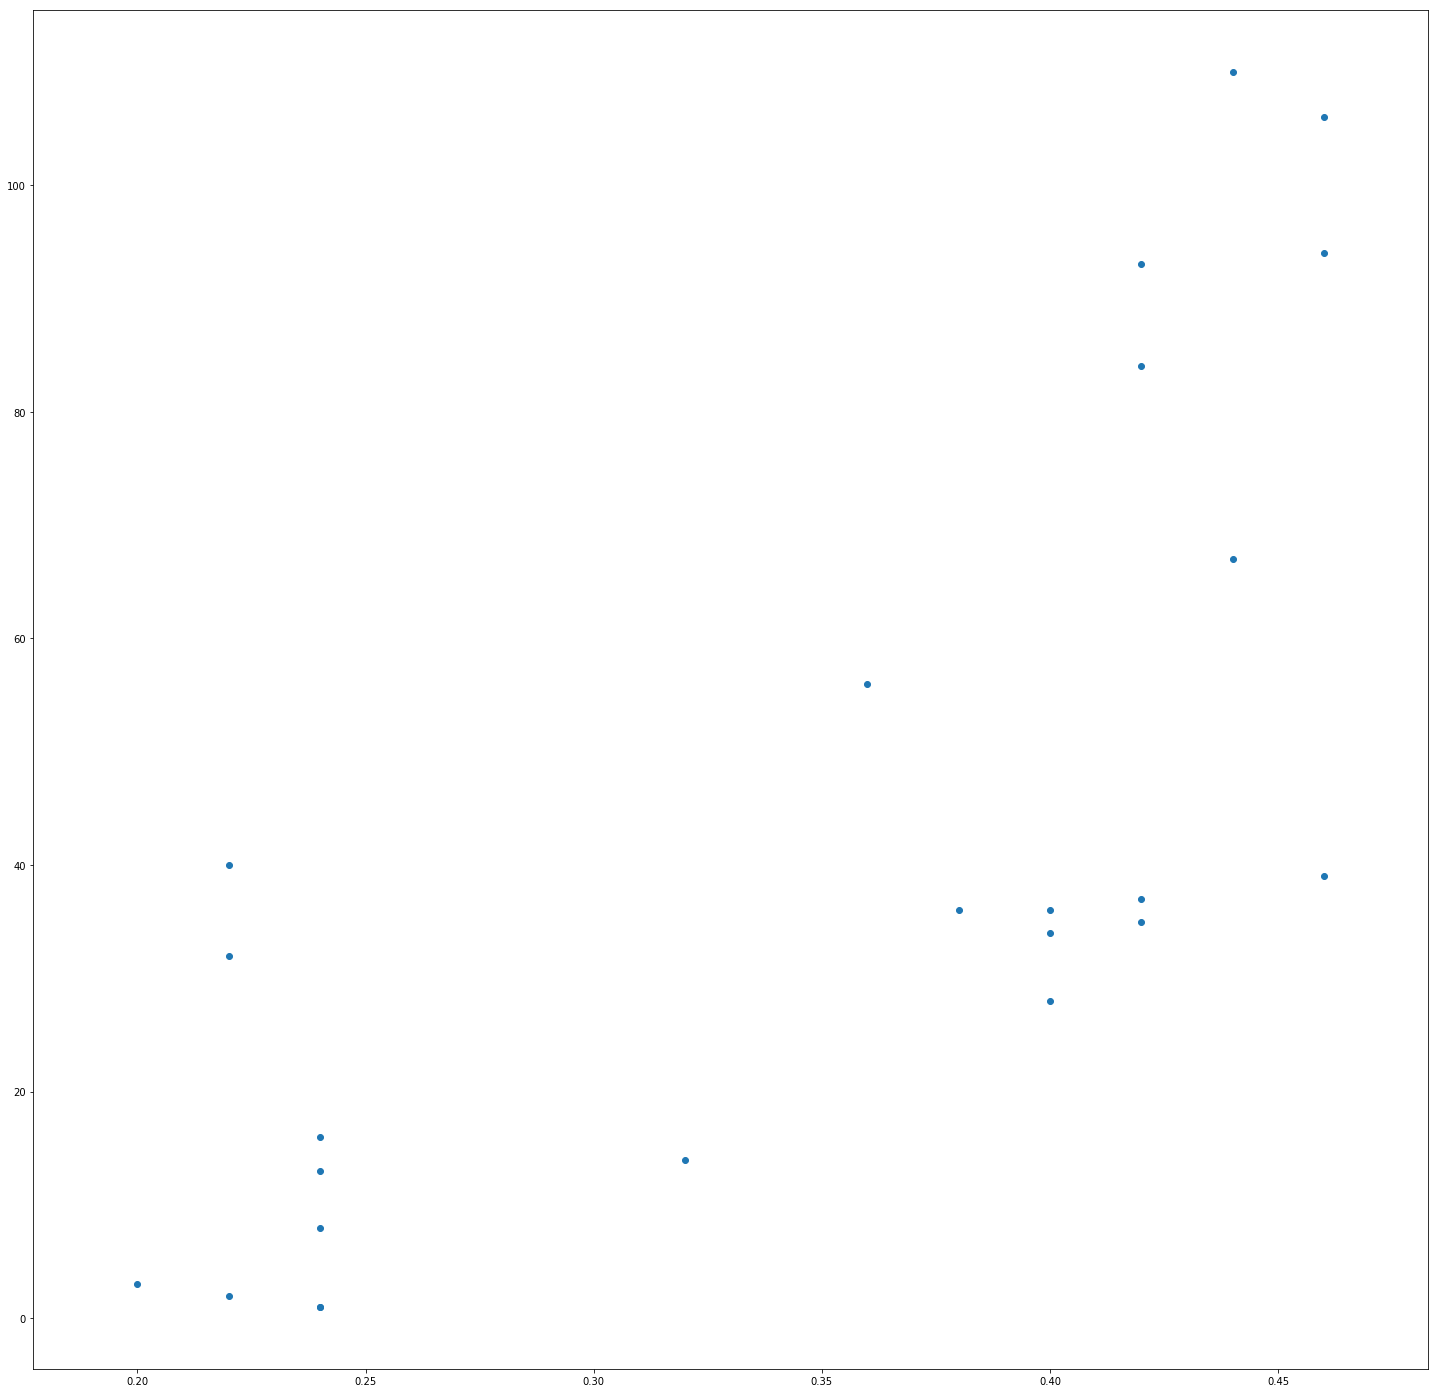

In [34]:
plt.scatter(df[df.dteday == "2011-01-01"].temp, df[df.dteday == "2011-01-01"].cnt)
fig = plt.gcf()
fig.set_size_inches(25, 25, forward=True)
plt.show()

In [6]:
X = df.iloc[:, :-1].copy()
X

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6


In [7]:
T = df.loc[:, 'cnt'].copy()

Sliced the data for visualization. It was taking too long. Feel free to comment the section below. 

In [8]:
X=X[:1000]
T=T[:1000]

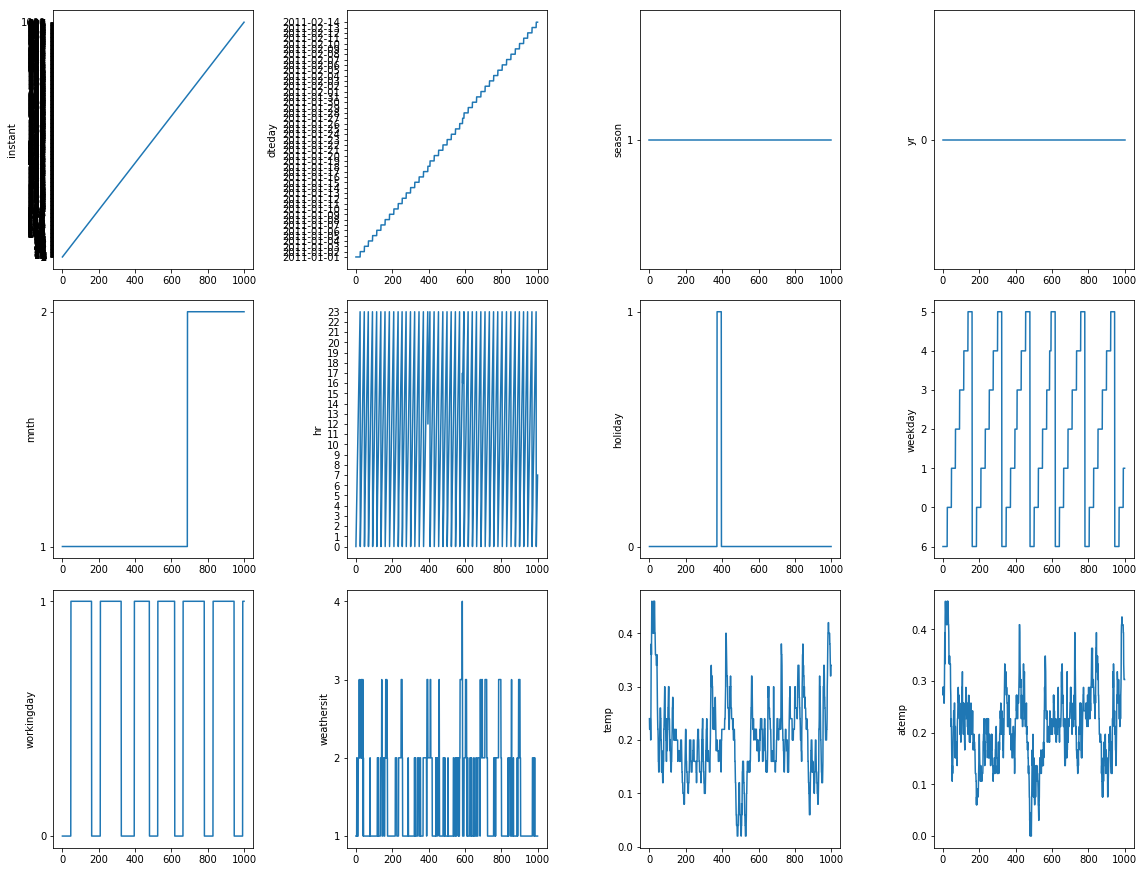

In [40]:
fig = plt.figure(figsize=(16,16))
plt.clf()
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

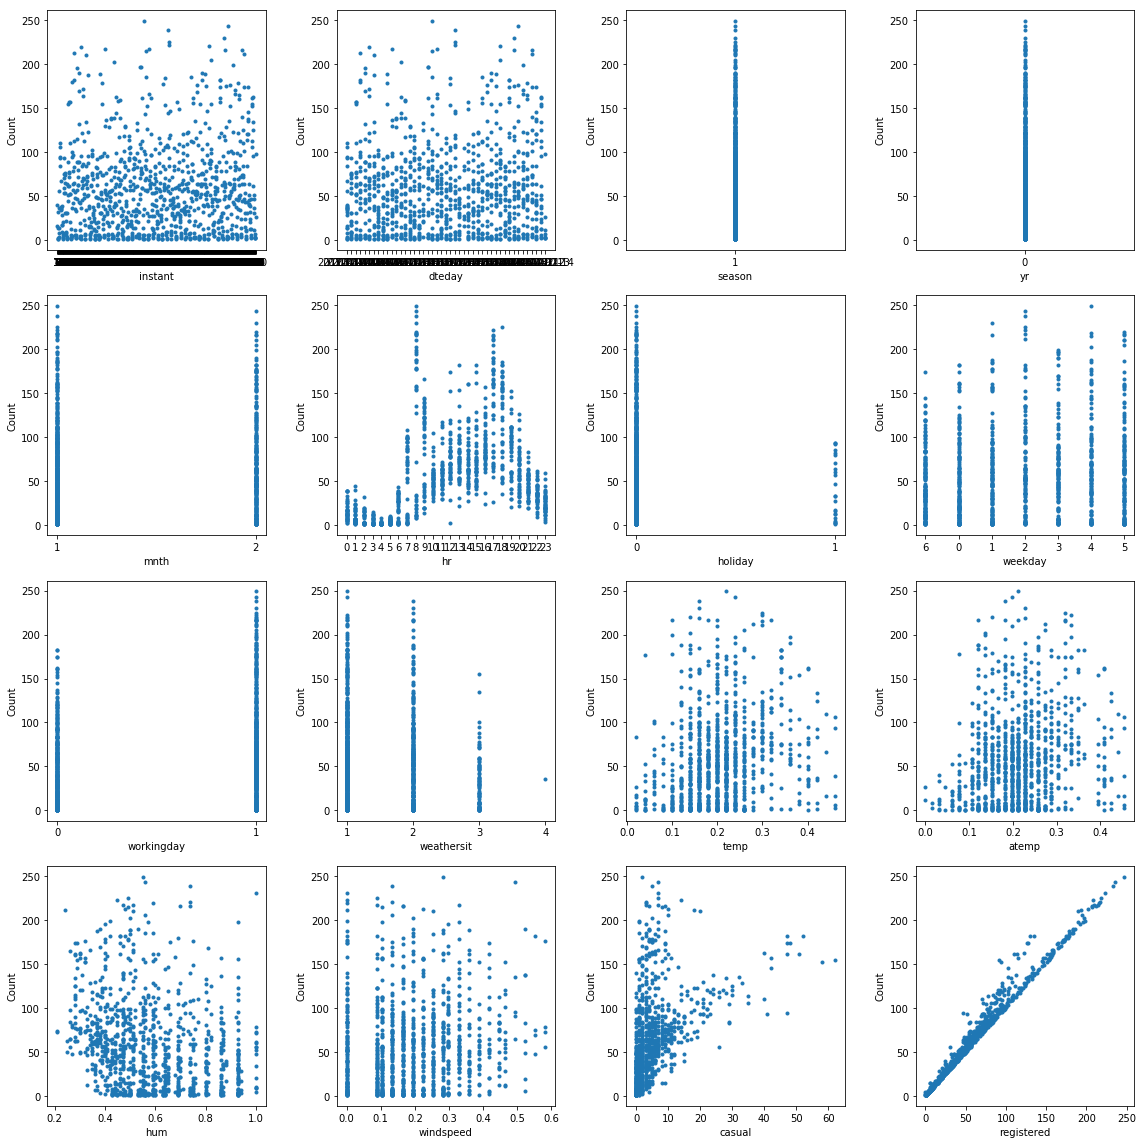

In [41]:
fig = plt.figure(figsize=(16,16))
plt.clf()
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Count')
fig.tight_layout()

### Preliminary observation

Some attributes don't show strong correlation to the count of bikes. Most of them are categorical and I don't think scatter plots are the best way to be used in such cases. I can see some patterns between hour and count of bikes and also casual and registered users. However, registered variable seems to have a direct correlation with the count of bikes. 

## Introduction of data for Classification & source

This dataset is the insurance dataset from a company based in Singapore. The source of the data is Kaggle website and is tagged as binary classification. 
Ther are 11 attributes in this dataset and the target label is the claim status. 

### Reading the data

In [3]:
with open("travelinsurance.csv") as csvFile:
    csvReader = csv.DictReader(csvFile)
    data = [i for i in csvReader]
df2 = pd.DataFrame(data)
df2

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,,37


In [ ]:
#Preprocessing of the data

In [4]:
df2 = df2[df2.notnull()]
df2 = df2[df2.Gender != ""]

Converting specific columns to numerical values. 

In [5]:
df2[["Duration", "Net Sales", "Commision (in value)", "Age"]]=df2[["Duration", "Net Sales", "Commision (in value)", "Age"]].apply(pd.to_numeric)

In [83]:
df2

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,F,71
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.00,42.35,F,44
11,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.00,6.30,M,47
12,KML,Travel Agency,Online,Premier Plan,No,53,NORWAY,-130.00,49.40,F,48
18,JZI,Airlines,Online,Basic Plan,No,3,MALAYSIA,-18.00,6.30,M,47
21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
24,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,M,26


In [53]:
df2.columns.values

array(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Gender', 'Age'], dtype=object)

In [6]:
X2 = df2.iloc[:, :-1].copy()

In [7]:
disChanneldic = {'Offline': 0, 'Online':1}
claimdic = {"No": 0, "Yes": 1}

X2['Claim'] = X2['Claim'].apply(lambda x: claimdic[x])

In [8]:
T2 = df2.loc[:, 'Claim'].copy()

### Visualization of the data

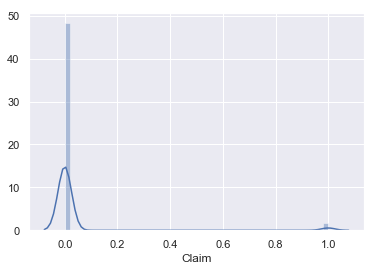

In [13]:
sns.distplot(X2["Claim"]);

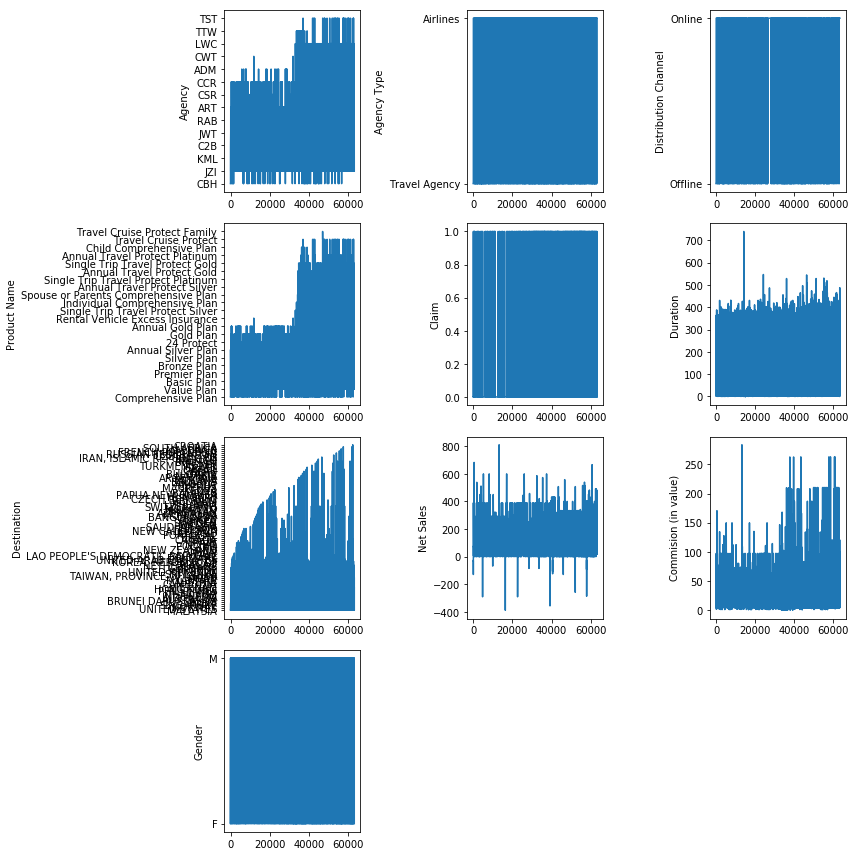

In [82]:
fig = plt.figure(figsize=(12,12))
plt.clf()
for i in range(10):
    plt.subplot(4, 3, i+1)
    plt.plot(X2.iloc[:, i])
    plt.ylabel(X2.columns.values[i])
fig.tight_layout()

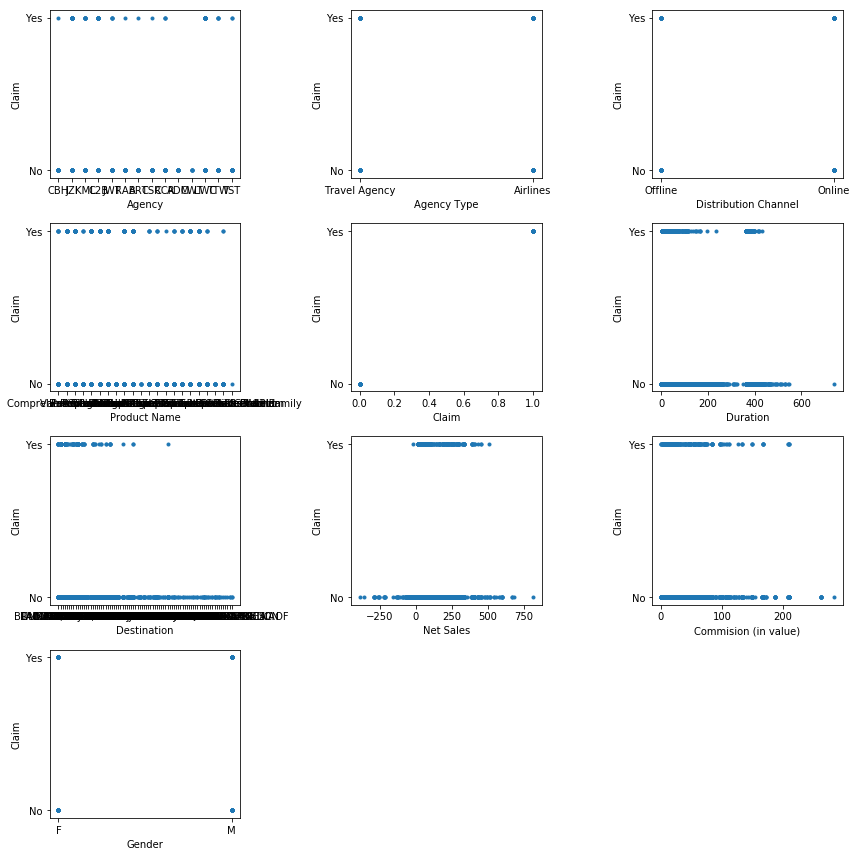

In [94]:
fig = plt.figure(figsize=(12,12))
plt.clf()
for i in range(10):
    plt.subplot(4, 3, i+1)
    plt.plot(X2.iloc[:, i], T2, '.')
    plt.xlabel(X2.columns.values[i])
    plt.ylabel('Claim')
fig.tight_layout()

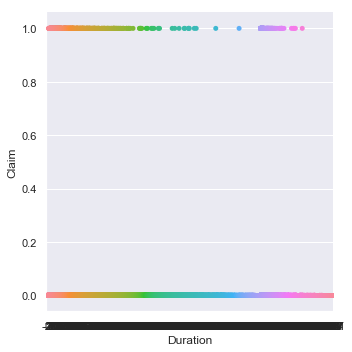

In [24]:
sns.catplot(x="Duration", y="Claim", data=X2);

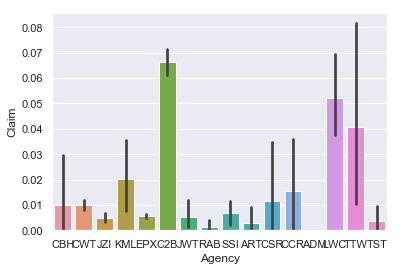

In [23]:
ax = sns.barplot(x="Agency", y="Claim", data=X2)

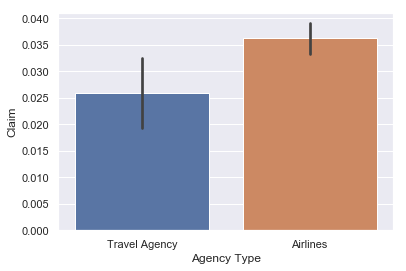

In [20]:
ax2 = sns.barplot(x="Agency Type", y="Claim", data=X2)

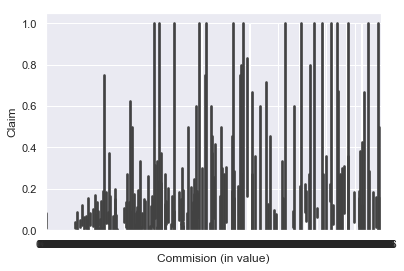

In [23]:
ax3 = sns.barplot(x="Commision (in value)", y="Claim", data=X2)

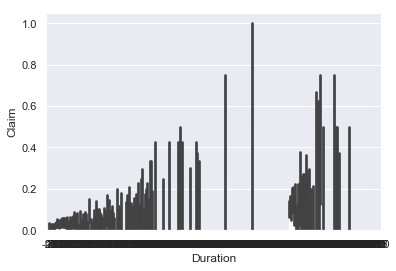

In [24]:
ax4 = sns.barplot(x="Duration", y="Claim", data=X2)

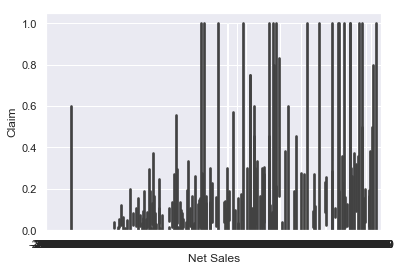

In [25]:
ax5 = sns.barplot(x="Net Sales", y="Claim", data=X2)

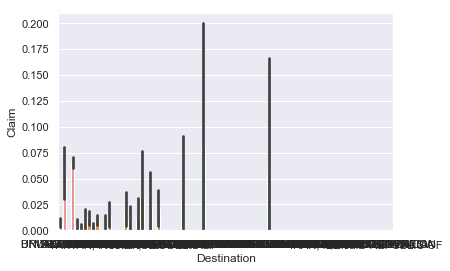

In [9]:
ax = sns.barplot(x="Destination", y="Claim", data=X2)

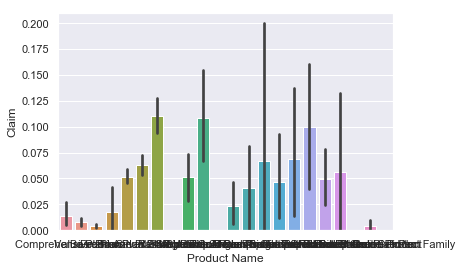

In [28]:
ax7 = sns.barplot(x="Product Name", y="Claim", data=X2)

### Preliminary observation
Scatter plots are not good visualization methods for catgeorical data for obvious reasons. After some trials to visualize the data through lines and scatter plots I started exploring other python libraries and other visualization methods for the classification dataset. 

Seaborn turned out to be more helpful. I explored box plots and bar charts for a couple of attributes.
The box plot shows that there are a couple of agencies with a stronger correlation with claim status. The same applies to the bar chart of destination/ claims. The correlation between duration and claim seems to be more seggregated.

## Conclusions

This might be a very basic conclusion, but I found visualizing categorical data more challenging in comparison to the numerical data.
I have no experience in machine learning but I am excited to see what would be the result of applying machine learning algorithms to my classification dataset. 


## References

Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, [Web Link]. 

zahier nasrudin. (2019). Available from Kaggle Web site: https://www.kaggle.com/mhdzahier/travel-insurance/home

Goodfellow, I., Bengio, Y., Courville, A., & Bengio, Y. (2016). Deep learning, vol. 1.
Lee, M., (2019), Data visualization workbook 